## Data Preprocessing

In [1]:
##Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt 
from sklearn import preprocessing 

In [2]:
## Importing the dataset
df = pd.read_csv('Data/Dataset.csv',header=0)

In [3]:
df.sample(2)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
3977,16:00:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,NaN,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Changing lane to the left,Slight Injury
12066,1:05:00,Friday,31-50,Male,Elementary school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury


In [4]:
print("The Dataset has %d rows and %d columns" % df.shape)

The Dataset has 12316 rows and 32 columns


In [5]:
df.duplicated().sum()

0

### Data Cleansing
* Handling Missing Values

In [6]:
print('The dataset has total of',df.isnull().sum().sum(),'Missing Values')

The dataset has total of 20057 Missing Values


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [8]:
df.isnull().mean().sort_values(ascending=False)*100 

Defect_of_vehicle              35.945112
Service_year_of_vehicle        31.893472
Work_of_casuality              25.966223
Fitness_of_casuality           21.394933
Type_of_vehicle                 7.713543
Types_of_Junction               7.202014
Driving_experience              6.731082
Educational_level               6.016564
Vehicle_driver_relation         4.701202
Owner_of_vehicle                3.913608
Lanes_or_Medians                3.126015
Vehicle_movement                2.500812
Area_accident_occured           1.940565
Road_surface_type               1.396557
Type_of_collision               1.258525
Road_allignment                 1.152972
Sex_of_driver                   0.000000
Age_band_of_driver              0.000000
Day_of_week                     0.000000
Accident_severity               0.000000
Cause_of_accident               0.000000
Road_surface_conditions         0.000000
Light_conditions                0.000000
Weather_conditions              0.000000
Number_of_vehicl

In [8]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("The dataset has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [9]:
missing_values_table(df)

The dataset has 32 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
Defect_of_vehicle,4427,35.9
Service_year_of_vehicle,3928,31.9
Work_of_casuality,3198,26.0
Fitness_of_casuality,2635,21.4
Type_of_vehicle,950,7.7
Types_of_Junction,887,7.2
Driving_experience,829,6.7
Educational_level,741,6.0
Vehicle_driver_relation,579,4.7
Owner_of_vehicle,482,3.9


#### Handling Categorical Missing values 
 We can see from the above info all the instances having missing values are Categorical.  

In [10]:
# Shows the columns with their number of catagories each variable is having
for col in df.columns:
    print(col, ':', len(df[col].unique()), 'catagories')

Time : 1074 catagories
Day_of_week : 7 catagories
Age_band_of_driver : 5 catagories
Sex_of_driver : 3 catagories
Educational_level : 8 catagories
Vehicle_driver_relation : 5 catagories
Driving_experience : 8 catagories
Type_of_vehicle : 18 catagories
Owner_of_vehicle : 5 catagories
Service_year_of_vehicle : 7 catagories
Defect_of_vehicle : 4 catagories
Area_accident_occured : 15 catagories
Lanes_or_Medians : 8 catagories
Road_allignment : 10 catagories
Types_of_Junction : 9 catagories
Road_surface_type : 6 catagories
Road_surface_conditions : 4 catagories
Light_conditions : 4 catagories
Weather_conditions : 9 catagories
Type_of_collision : 11 catagories
Number_of_vehicles_involved : 6 catagories
Number_of_casualties : 8 catagories
Vehicle_movement : 14 catagories
Casualty_class : 4 catagories
Sex_of_casualty : 3 catagories
Age_band_of_casualty : 6 catagories
Casualty_severity : 4 catagories
Work_of_casuality : 8 catagories
Fitness_of_casuality : 6 catagories
Pedestrian_movement : 9 cat

In [11]:
### We will handle the catagorical missing value by replacing NaN values with a new catagory
def impute_nan(df,variable):
    df[variable]=np.where(df[variable].isnull(),"Unknown",df[variable])

In [12]:
### Select all the attributes that have missing value and replace with "Unknown" Category
for cat in ['Educational_level','Vehicle_driver_relation','Driving_experience','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured',
            'Lanes_or_Medians','Road_allignment','Types_of_Junction','Road_surface_type','Type_of_collision','Vehicle_movement',
            'Work_of_casuality','Fitness_of_casuality','Pedestrian_movement']: impute_nan(df,cat)

In [13]:
print(df.isnull().sum().sum(),"Missing value: All the missing values are handled")

0 Missing value: All the missing values are handled


### Feature Selection
From the total 32 features 15 features are selected by discussing with domain experts and understanding the problem domain.

In [14]:
data=df.copy()

In [15]:
### Dropping the remaining variables
data.drop(['Time','Day_of_week','Type_of_vehicle','Owner_of_vehicle','Service_year_of_vehicle','Defect_of_vehicle','Area_accident_occured','Road_allignment',
        'Road_surface_conditions','Number_of_vehicles_involved','Number_of_casualties','Casualty_class','Sex_of_casualty','Age_band_of_casualty',
        'Work_of_casuality','Fitness_of_casuality','Casualty_severity'], axis=1, inplace=True)

In [16]:
data.head(3)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,Serious Injury


In [17]:
### The selected features are:
data.columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Data Visualization

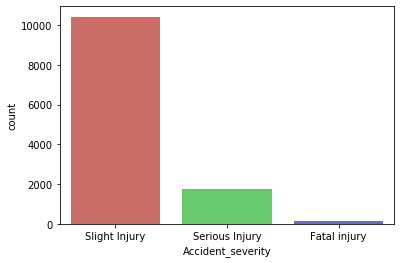

In [18]:
sns.countplot(x='Accident_severity',data=data,palette='hls')
plt.show()

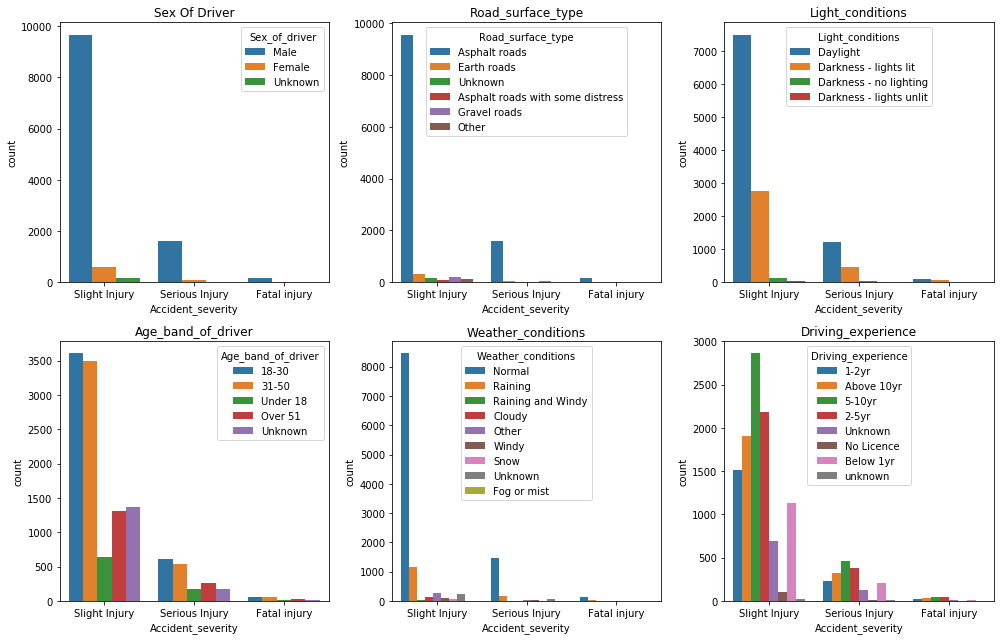

In [19]:
# Countplots to visualize how each feature affects the ouput class 

fig, axes = plt.subplots(2,3, figsize=(14,9))
axes[0,0].set_title('Sex Of Driver')
sns.countplot(x = 'Accident_severity', hue='Sex_of_driver', data = data, ax=axes[0,0])
axes[1,0].set_title('Age_band_of_driver')
sns.countplot(x = 'Accident_severity', hue='Age_band_of_driver', data = data, ax=axes[1,0])
axes[0,1].set_title('Road_surface_type')
sns.countplot(x = 'Accident_severity', hue='Road_surface_type', data = data, ax=axes[0,1])
axes[1,1].set_title('Weather_conditions')
sns.countplot(x = 'Accident_severity', hue='Weather_conditions', data = data, ax=axes[1,1])
axes[0,2].set_title('Light_conditions')
sns.countplot(x = 'Accident_severity', hue='Light_conditions', data = data, ax=axes[0,2])
axes[1,2].set_title('Driving_experience')
sns.countplot(x = 'Accident_severity', hue='Driving_experience', data = data, ax=axes[1,2])
plt.tight_layout()

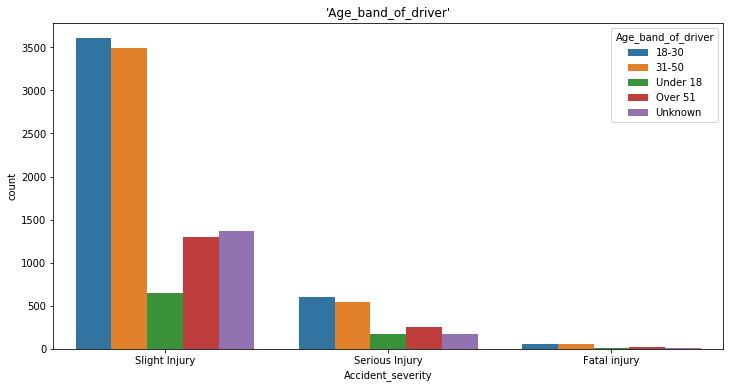

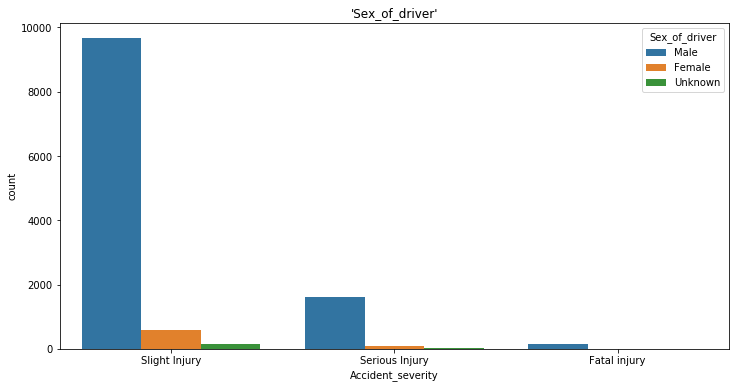

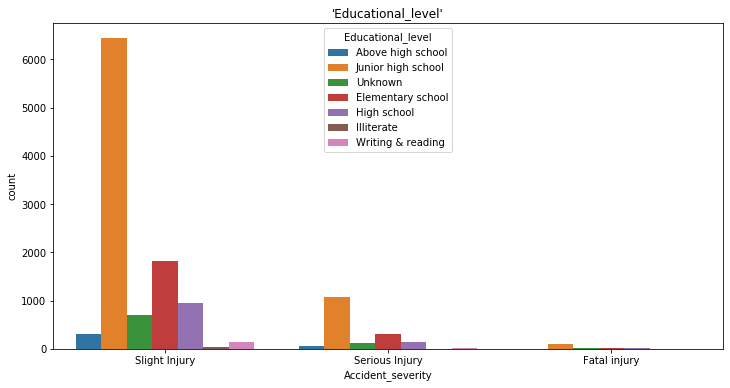

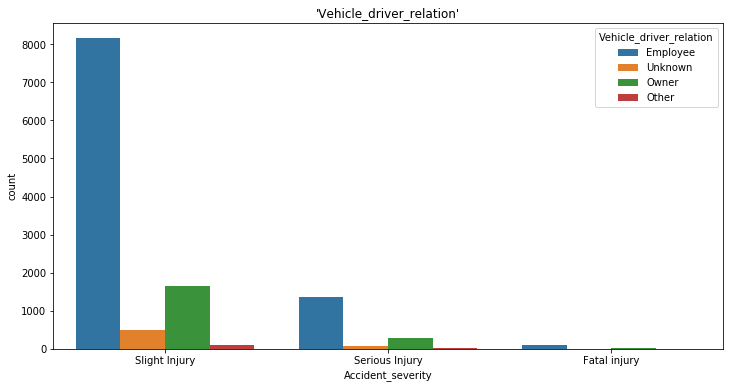

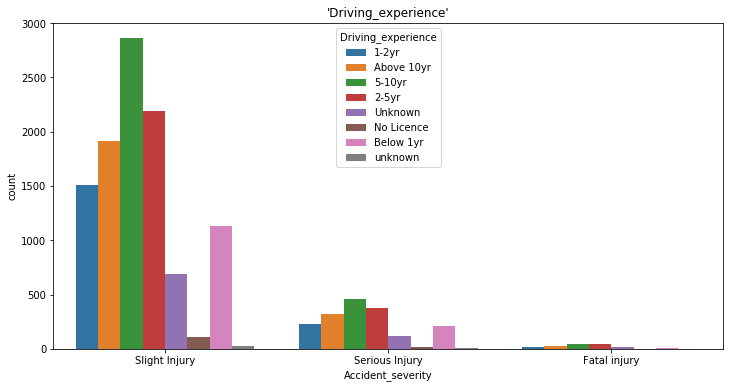

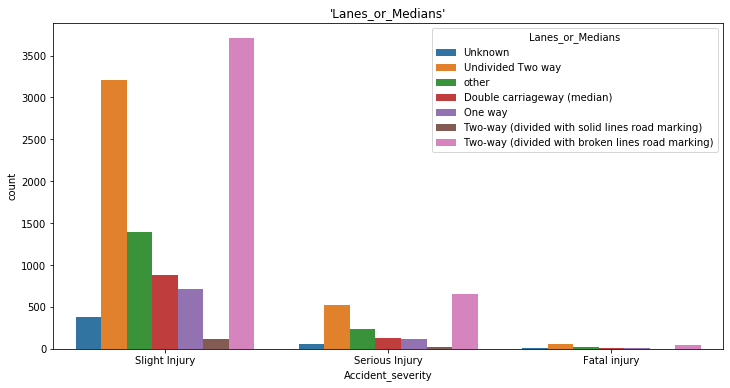

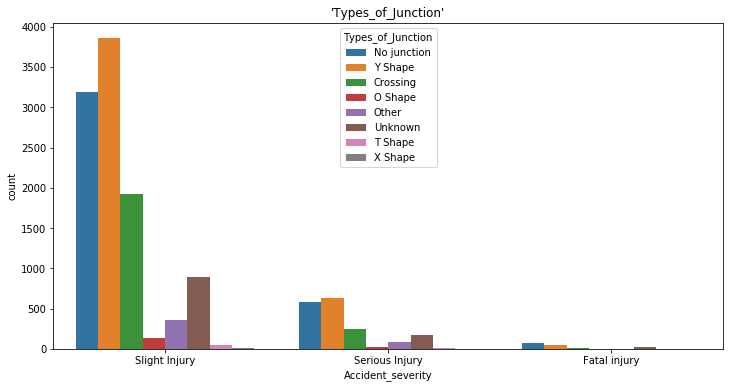

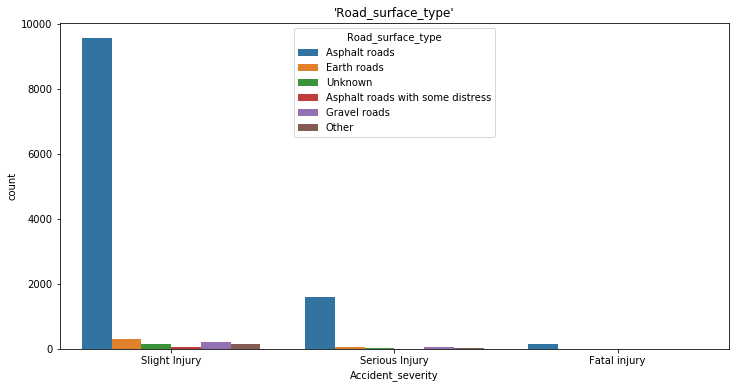

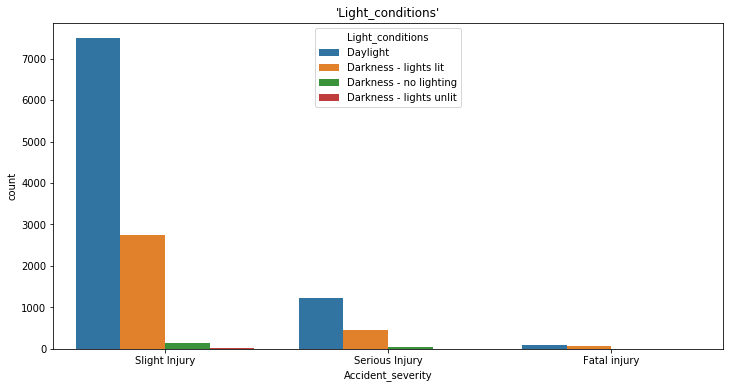

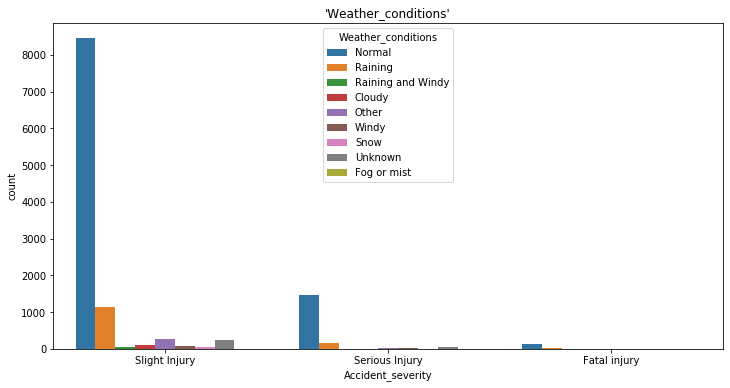

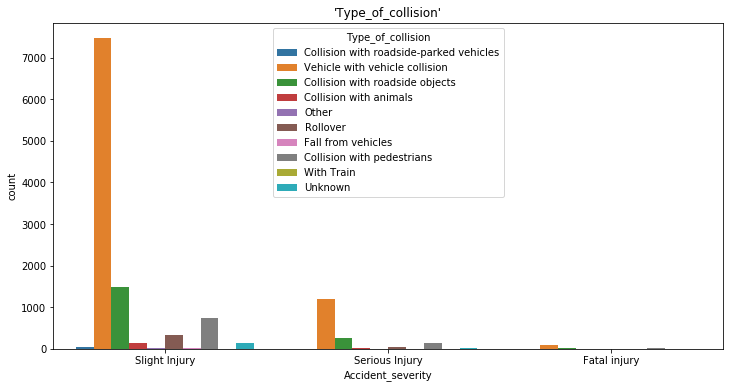

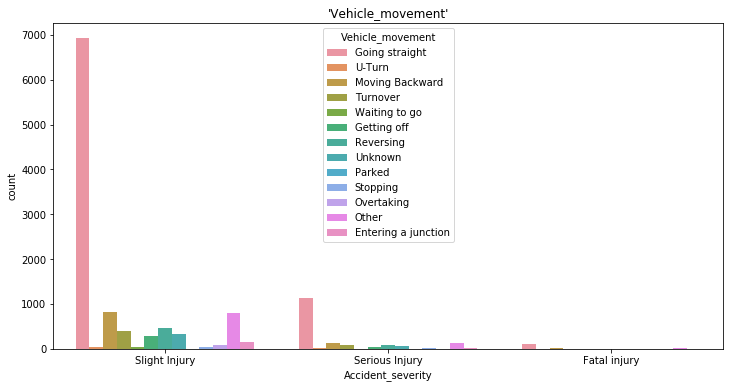

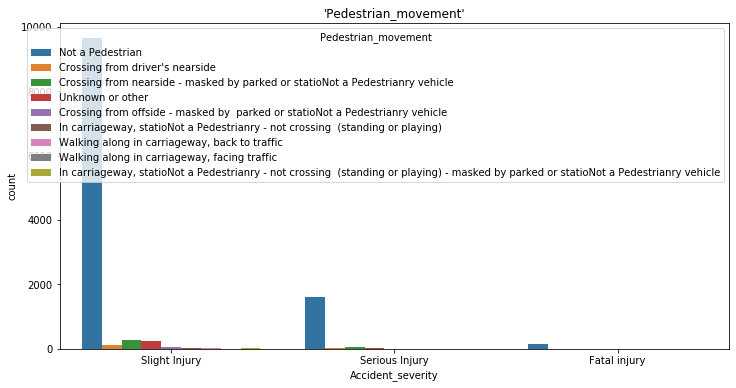

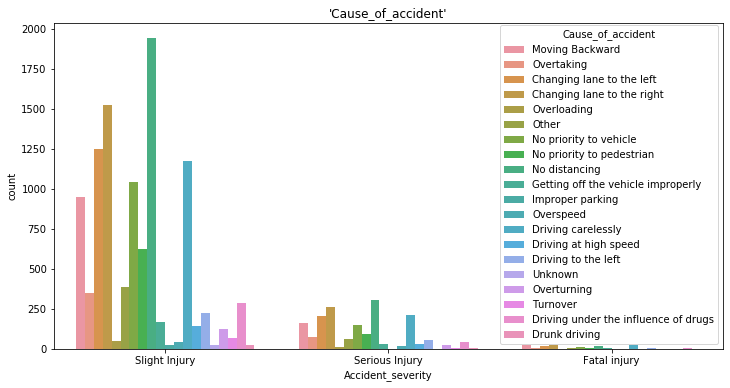

In [21]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("'%s'"%i)
    sns.countplot(data['Accident_severity'],hue=data[i])

In [20]:
data.shape

(12316, 15)

In [21]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
data['Accident_severity'] = label_encoder.fit_transform(data['Accident_severity']) 
  
data['Accident_severity'].unique() 

array([2, 1, 0])

In [22]:
data.sample(3)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
6917,Unknown,Male,Junior high school,Employee,5-10yr,other,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Overtaking,Not a Pedestrian,Overtaking,2
7017,Over 51,Male,Junior high school,Employee,1-2yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No priority to pedestrian,2
8177,31-50,Male,Above high school,Employee,2-5yr,Double carriageway (median),Y Shape,Other,Daylight,Normal,Collision with animals,Going straight,Not a Pedestrian,Driving to the left,2


In [23]:
data.to_csv('Data\cleaned.csv',index=False)